# Gaussian Mixtures

Gaussian Mixture Models (GMM) assume that clusters follow a Gaussian normal distribution. Thus, GMM are suited to find clusters of different ellipsoidal shape, size, density, and orientation which is an advantage compared to k-means. Furthermore, GMM can identify overlapping clusters. However, it might capture noise instead of an underlying distribution if too many clusters are used during the application of this approach (overfitting). While k-means employs solely the mean to find the cluster center, Gaussian mixtures employ also the covariance to determine the Gaussian representing a cluster of an ellipsoid shape. The Gaussians of all clusters are determined in an iterative loop similar to k-means. Therefore, GMM is sensitive to initialization as well. For more details on GMM, we recommend a video of Alexander Ihler (<a href="https://www.youtube.com/watch?v=qMTuMa86NzU">Link to YouTube</a>). GMM scale commonly with $O(kmn^3)$ while k-means scale with $O(kmn)$. Thus, GMM are getting slow with a large number of input features $n$. Please note, there exists also GMM implementations which scale $O(kmn^2)$ (<a href="https://doi.org/10.1371/journal.pone.0139931">link to work of Pinto and Engel</a>). Below is the code to setup a GMM with scikit-learn. The hyperparameters should be known from the k-means notebook. 

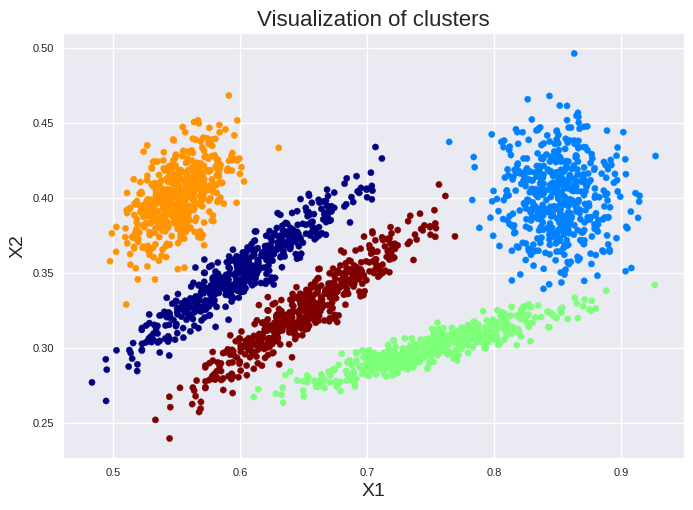

In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd

X = pd.read_csv('cluster2_data.csv')

gm = GaussianMixture(n_components=5, n_init=10, init_params='k-means++',random_state=42)
gm.fit(X)

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

plt.scatter(X["X1"], X["X2"], c=gm.predict(X), cmap=plt.cm.jet, s=20)
plt.title("Visualization of clusters", fontsize=16)
plt.xlabel("X1", fontsize=14)
plt.ylabel("X2", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

We can check if the iterative loop is converged by:

In [2]:
gm.converged_

True

We can also get the number of iteration cycles to find the solution:

In [3]:
gm.n_iter_

14

We can get the weight of each cluster:

In [4]:
gm.weights_

array([0.19965195, 0.20143667, 0.19842254, 0.20025525, 0.20023358])

Thus, all clusters have nearly the same number of instances. Furthermore, we can get also the centers and the covariance of each ellipsoid:

In [5]:
print("Center of each cluster:")
print(gm.means_)

print("\n Covariance of each cluster:")
print(gm.covariances_)

Center of each cluster:
[[0.60135705 0.35066716]
 [0.85014451 0.40051052]
 [0.75041715 0.30023747]
 [0.5507546  0.40022682]
 [0.65136471 0.32566036]]

 Covariance of each cluster:
[[[ 1.88052265e-03  1.11568733e-03]
  [ 1.11568733e-03  7.40332699e-04]]

 [[ 5.82621192e-04 -2.51588852e-05]
  [-2.51588852e-05  6.42090039e-04]]

 [[ 2.57307792e-03  6.16636988e-04]
  [ 6.16636988e-04  1.79170324e-04]]

 [[ 4.21230610e-04  2.17076193e-04]
  [ 2.17076193e-04  4.05532069e-04]]

 [[ 1.90185742e-03  1.12893249e-03]
  [ 1.12893249e-03  7.49129478e-04]]]


We can easily check to which cluster a (new) data point would be assigned:

In [6]:
gm.predict([[0.55,0.35]])

/home/iom/ml/ai-school/venv-ai-school/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


array([3])

Or get the probability to which cluster the (new) data point might belong:

In [8]:
gm.predict_proba([[0.55,0.35]]).round(3)

/home/iom/ml/ai-school/venv-ai-school/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


array([[0.097, 0.   , 0.   , 0.903, 0.   ]])

However, the question arises how the number of clusters can be determined. The silhouette is unsuited due to the ellipsoid shape. You can either use the Bayesian information criterion (BIC) or the Akaike information criterion (AIC). Both approaches rewards models that fit the data well and penalize complexity. They provide often similar results. However, BIC penalize complexity stronger. Thus, AIC tend to more parameters which might result in a better fit.   

BIC and AIC are accessible as follow: 

In [13]:
print("BIC: %0.2f" % gm.bic(X))
print("AIC: %0.2f" % gm.aic(X))

BIC: -16852.03
AIC: -17020.93


In [14]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, init_params='k-means++', random_state=42).fit(X) for k in range(2, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

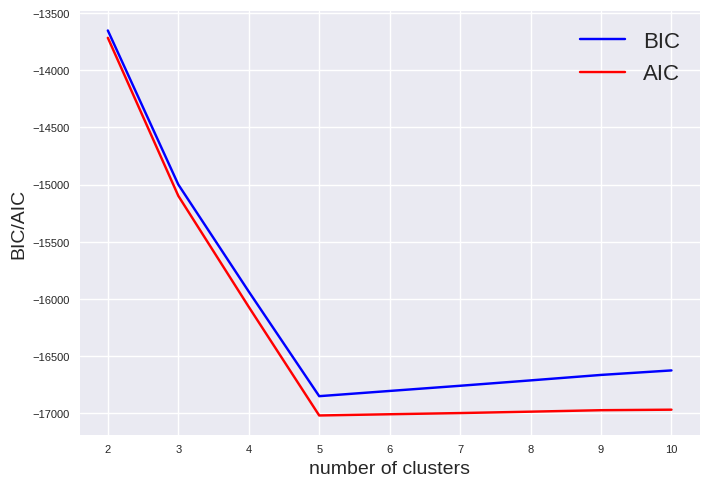

In [25]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

plt.plot(range(2, 11), bics, "b", label="BIC")
plt.plot(range(2, 11), aics, "r", label="AIC")
plt.xlabel("number of clusters", fontsize=14)
plt.ylabel("BIC/AIC", fontsize=14)
plt.legend(fontsize=16)
plt.tick_params(labelsize=8)

plt.show()

The minimum of BIC and AIC is visible at 5 clusters indicating the best model. 